In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

$$f(x,y)= exp(-(x^2+y^2))$$

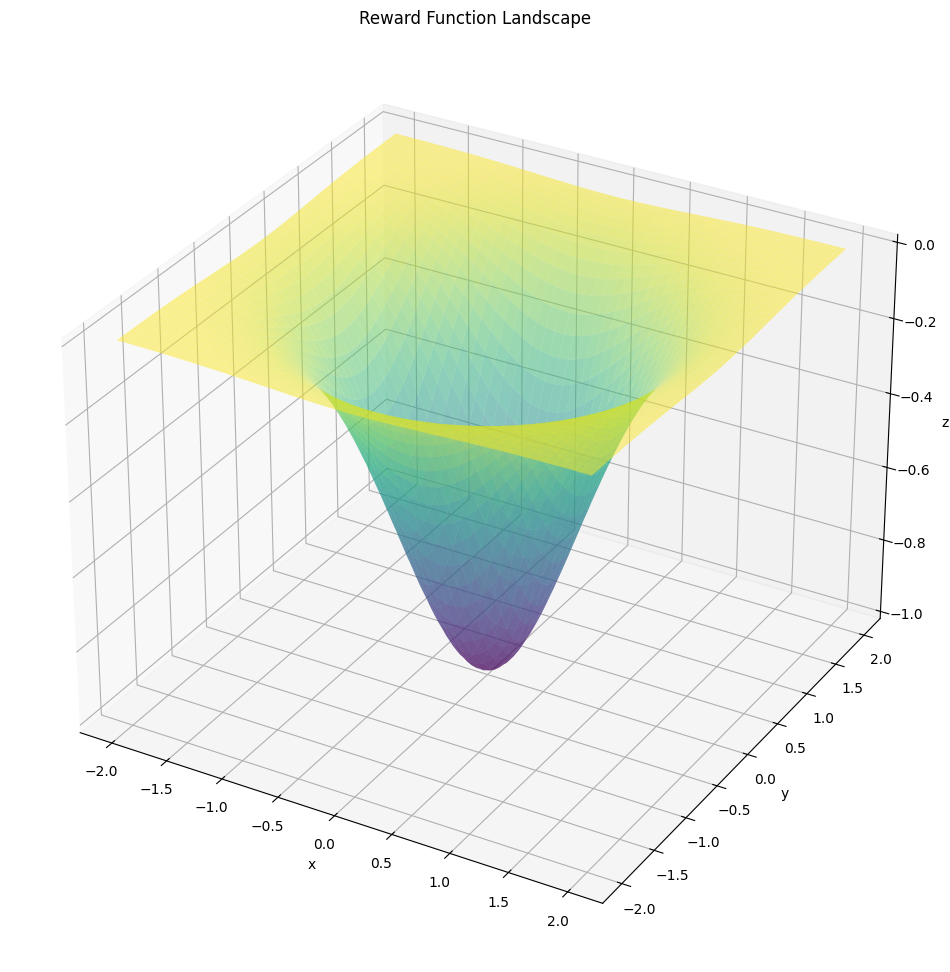

In [3]:
# Create grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Reward function
Z = -np.exp(-(X**2 + Y**2))

# Plot
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Reward Function Landscape')
plt.show()

In [28]:
# iterations
num_iter=2000

# Learning rate
lr = 0.01

# Initialize parameters randomly
x, y = -1.8, 1.8

# Store trajectory
trajectory = []

for step in range(num_iter):
  reward = -np.exp(-(x**2 + y**2))
  trajectory.append((x, y, reward))

  # Gradients
  dx = 2 * x * reward
  dy = 2 * y * reward

  # Update (gradient ascent)
  x = x + lr * dx
  y = y + lr * dy

trajectory = np.array(trajectory)

In [6]:
#for i, r in enumerate(trajectory, start=1):
#    print(i, "(",r[0], ",", r[1],")")

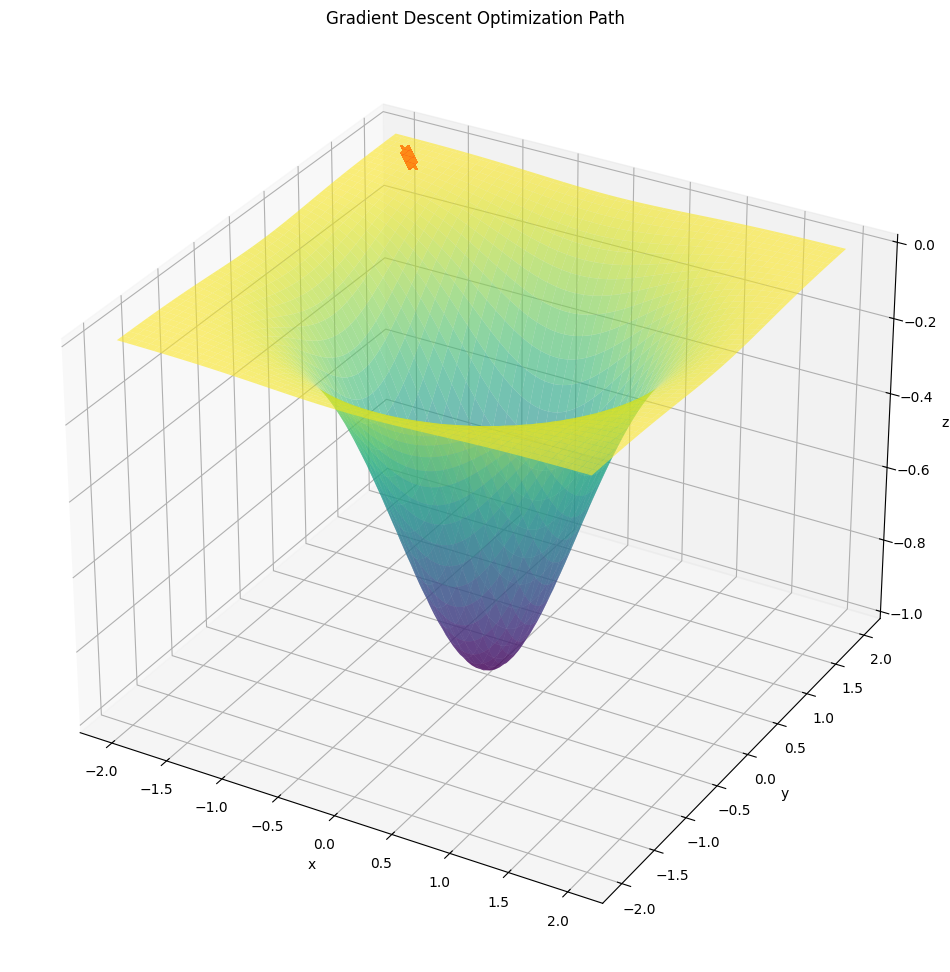

In [29]:
fig = plt.figure(figsize=(12, 20))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', marker='x')

ax.set_title('Gradient Descent Optimization Path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Regresión Lineal con Gradiente Descendente

$$
y = m x + b
$$

$$
J(m,b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - m x_i - b)^2
$$

$$
\frac{\partial J}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_i \, (y_i - m x_i - b)
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - m x_i - b)
$$

$$
m := m - \alpha \frac{\partial J}{\partial m}
\quad,\quad
b := b - \alpha \frac{\partial J}{\partial b}
$$


In [30]:
class GradientDescentLinearRegression:
    """
    Implementacion de Gradiente Descendiente
    """
    def __init__(self, learning_rate=0.01, iterations=1000, initial_m=5, initial_b=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.initial_m = initial_m
        self.initial_b = initial_b
    
    def fit(self, X, y):
        """
        Actualizacion de los pesos con gradiente descendente
        """
        b = 0
        m = 5
        n = X.shape[0]
        for i in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)

            # Print current values and function value for monitoring
            if i % 50 == 0:
                error = mean_squared_error(m*X + b, y)
                print(f"Iteration {i}: b={b:.4f}, m={m:.4f}, MSE={error:.4f}")
        
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [31]:
X = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.5)
y = np.array(sorted(list(range(5))*200)) + np.random.normal(size=1000, scale=0.25)

Iteration 0: b=0.0161, m=4.9491, MSE=100.8653
Iteration 50: b=0.5702, m=3.0222, MSE=32.0746
Iteration 100: b=0.7908, m=1.9471, MSE=10.0838
Iteration 150: b=0.8351, m=1.3598, MSE=3.2167
Iteration 200: b=0.7916, m=1.0497, MSE=1.1387
Iteration 250: b=0.7091, m=0.8954, MSE=0.5343
Iteration 300: b=0.6139, m=0.8272, MSE=0.3653
Iteration 350: b=0.5196, m=0.8054, MSE=0.3182


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

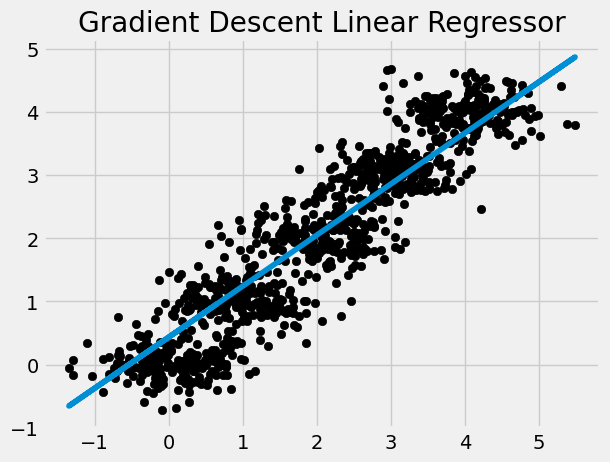

In [38]:
model = GradientDescentLinearRegression(
    initial_m=100,
    initial_b=100,
    learning_rate=0.001,
    iterations=400)
model.fit(X, y)

plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")